In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df =pd.read_csv('module2resultextree.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417850 entries, 0 to 417849
Data columns (total 36 columns):
Unnamed: 0         417850 non-null int64
Quarter            417850 non-null int64
Year               417850 non-null int64
Month              417850 non-null int64
DayofMonth         417850 non-null int64
CRSDepTime         417850 non-null int64
DepDelayMinutes    417850 non-null float64
OriginAirportID    417850 non-null int64
DestAirportID      417850 non-null int64
CRSArrTime         417850 non-null int64
ArrDelayMinutes    417850 non-null float64
windspeedKmph_x    417850 non-null int64
weatherCode_x      417850 non-null int64
precipMM_x         417850 non-null float64
WindGustKmph_x     417850 non-null int64
pressure_x         417850 non-null int64
cloudcover_x       417850 non-null int64
winddirDegree_x    417850 non-null int64
humidity_x         417850 non-null int64
cloudcover.1_x     417850 non-null int64
DewPointF_x        417850 non-null int64
tempF_x            417

In [4]:
y=df['ArrDelayMinutes']
X=df.drop(['ArrDelayMinutes','Unnamed: 0'],axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
#LINEAR REGRESSION

from sklearn import datasets, linear_model, metrics 
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
pred_lr=reg.predict(X_test)


In [7]:
#LINEAR REGRESSION

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

print("r2 : ",r2_score(y_test,pred_lr))
print("MAE :",mean_absolute_error(y_test,pred_lr))
print("RMSE :",math.sqrt(mean_squared_error(y_test,pred_lr)))

r2 :  0.9458877397780099
MAE : 11.800973019947415
RMSE : 16.835091118645643


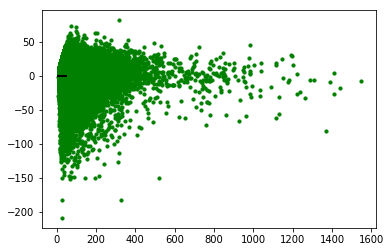

In [30]:
# plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, s = 10,alpha=0.5,c="b") 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,  s = 10, c="g") 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

In [40]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)


c:\users\kevin thelly\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
pred_etr=etr.predict(X_test)
print("r2 : ",r2_score(y_test,pred_etr))
print("MAE :",mean_absolute_error(y_test,pred_etr))
print("RMSE :",math.sqrt(mean_squared_error(y_test,pred_etr)))

r2 :  0.9449376533759882
MAE : 12.429365801124808
RMSE : 17.33315448514457


In [16]:
#FEATURE IMPORTANCE
import numpy as np
importances=etr.feature_importances_
std= np.std([tree.feature_importances_ for tree in etr.estimators_],axis=0)
indices=np.argsort(importances)[::-1]

In [33]:
#PRINTING FEATURE IMPORTANCE
print("Feature Ranking")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1,indices[f],importances[indices[f]]))

Feature Ranking
1. feature 5 (0.942133)
2. feature 12 (0.003018)
3. feature 10 (0.002483)
4. feature 8 (0.002382)
5. feature 4 (0.002149)
6. feature 9 (0.002049)
7. feature 7 (0.002040)
8. feature 25 (0.002008)
9. feature 24 (0.001989)
10. feature 27 (0.001969)
11. feature 6 (0.001926)
12. feature 3 (0.001920)
13. feature 21 (0.001888)
14. feature 15 (0.001876)
15. feature 18 (0.001875)
16. feature 13 (0.001873)
17. feature 16 (0.001870)
18. feature 11 (0.001827)
19. feature 30 (0.001800)
20. feature 28 (0.001770)
21. feature 31 (0.001744)
22. feature 32 (0.001703)
23. feature 22 (0.001695)
24. feature 23 (0.001688)
25. feature 19 (0.001667)
26. feature 20 (0.001652)
27. feature 14 (0.001431)
28. feature 17 (0.001389)
29. feature 29 (0.001354)
30. feature 2 (0.001350)
31. feature 26 (0.001336)
32. feature 1 (0.001095)
33. feature 0 (0.001051)
34. feature 33 (0.000000)


In [48]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor()
regr.fit(X_train,y_train)
pred_regr=regr.predict(X_test)
print("r2 : ",r2_score(y_test,pred_regr))
print("MAE :",mean_absolute_error(y_test,pred_regr))
print("RMSE :",math.sqrt(mean_squared_error(y_test,pred_regr)))

c:\users\kevin thelly\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


r2 :  0.9452492517566448
MAE : 12.394300187467591
RMSE : 17.284040653712513


In [46]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train,y_train)

c:\users\kevin thelly\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [47]:
pred_xgb=model.predict(X_test)
print("r2 : ",r2_score(y_test,pred_xgb))
print("MAE :",mean_absolute_error(y_test,pred_xgb))
print("RMSE :",math.sqrt(mean_squared_error(y_test,pred_xgb)))

r2 :  0.9497081127912683
MAE : 11.68410677320723
RMSE : 16.565296596363357
